## Product Review Sentiment Analysis

The project's goal is to predict customer sentiment based on the review of the products the customer provides. By analyzing these reviews, 
we can identify the intent of why the customer has given the reviews. These insights can contribute to what companies can do to improve their
negative review product and what they can continue to do based on the positive comments for their product development and marketing 
strategies to increase overall sales. This analysis involves efficiently processing large text data using Natural Language Processing to 
identify the sentiments of the customer review comments. Implementing this model can significantly contribute to increased trust and 
loyalty with the customer.

### Business Objective

The business objective is to find a model that predicts customer sentiment based on the review comments. 
Identifying the intent (feature weight of the words) can provide insights that can contribute to product development, marketing strategies,
and improvement of customer services. This type of model can help to increase trust and loyalty with the customer thereby increasing Sales 
and Customer Satisfaction

### Data

The Dataset used in this project is sourced from Kaggle https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/data
This is a list of over 67,000 consumer reviews for Amazon products like the Kindle, Fire TV Stick, and more provided by Datafiniti's Product Database.
The dataset includes basic product information, rating, review text, and more for each product.

#### Import and Setup

In [411]:
# Importing the libraries
# Pandas and Numpy
import pandas as pd
import numpy as np
# data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# NLP Libraries
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, sent_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer 

# Text Preprocessing
import string
from string import digits

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [419]:
# Read the Data as Pandas Dataframe
df1 = pd.read_csv('data/1429_1.csv',low_memory=False)
df2 = pd.read_csv('data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip',low_memory=False)
df3 = pd.read_csv('data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv.zip',low_memory=False)
df = pd.concat([df1,df2,df3],ignore_index=True)[df1.columns.tolist()]

In [420]:
# View the dataframe
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


#### Exploratory Data Analysis

In [421]:
# Check the column details and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67992 entries, 0 to 67991
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    67992 non-null  object 
 1   name                  61232 non-null  object 
 2   asins                 67990 non-null  object 
 3   brand                 67992 non-null  object 
 4   categories            67992 non-null  object 
 5   keys                  67992 non-null  object 
 6   manufacturer          67992 non-null  object 
 7   reviews.date          67953 non-null  object 
 8   reviews.dateAdded     25091 non-null  object 
 9   reviews.dateSeen      67992 non-null  object 
 10  reviews.didPurchase   10 non-null     object 
 11  reviews.doRecommend   55152 non-null  object 
 12  reviews.id            71 non-null     float64
 13  reviews.numHelpful    55246 non-null  float64
 14  reviews.rating        67959 non-null  float64
 15  reviews.sourceURLs 

In [352]:
# Check for Duplicates
df.duplicated().sum()

641

In [353]:
# Dropping Duplicates
df = df.drop_duplicates()

In [354]:
# Check for null values
df.isna().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       42268
reviews.dateSeen            0
reviews.didPurchase     67341
reviews.doRecommend     12840
reviews.id              67280
reviews.numHelpful      12746
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title              19
reviews.userCity        67351
reviews.userProvince    67351
reviews.username           12
dtype: int64

In [355]:
df.shape

(67351, 21)

In [356]:
# Fill the missing values of the name with Categories.
df['name'] = df['name'].fillna(df['categories'])

In [357]:
# Check the Product name and its review comments. View the Product name by extracting the words before frist comma
pd.set_option('display.max_rows', 500)
df['name'].str.extract(r'^([^,]+)').value_counts()

0                                                                                                                 
Fire Tablet                                                                                                           12646
AmazonBasics AAA Performance Alkaline Batteries (36 Count)                                                             8343
All-New Fire HD 8 Tablet                                                                                               6794
Fire Kids Edition Tablet                                                                                               6410
Back To College                                                                                                        5056
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary                                         3728
Echo (White)                                                                                                           3310
Amazon Kindle Pap

In [358]:
# Standardize the naming for the Product
df['name'] = df['name'].str.extract(r'^([^,]+)')

In [359]:
# Standardize the naming for the Product
df['name'] = df['name'].replace({'Fire Tablet':'Amazon Fire Tablet',
                                 'Fire HD 10 Tablet':'Amazon Fire Tablet',
                                 'AmazonBasics AAA Performance Alkaline Batteries (36 Count)':'Batteries',
                                 'Fire Kids Edition Tablet': 'Amazon Fire Tablet',
                                 'AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary':'Batteries',
                                 'Echo (White)':'Echo',
                                 'Fire Tablet with Alexa':'Amazon Fire Tablet',
                                 'All-New Fire 7 Tablet with Alexa':'Amazon Fire Tablet',
                                 'Kindle Voyage E-reader':'Amazon Kindle eBook reader',
                                 'Kindle E-reader - White':'Amazon Kindle eBook reader',
                                 'Oasis E-reader':'Amazon Kindle eBook reader',
                                 'Amazon Kindle E-Reader 6" Wifi (8th Generation':'Amazon Kindle eBook reader',
                                 'Amazon - Kindle Voyage - 6" - 4GB - Black':'Amazon Kindle eBook reader',
                                 'Amazon Fire HD 8 with Alexa (8" HD Display Tablet)':'Amazon Fire Tablet',
                                 'Kindle Oasis E-reader with Leather Charging Cover - Walnut':'Amazon Kindle eBook reader',
                                 'Amazon Kindle Voyage':'Amazon Kindle eBook reader',
                                 'All-New Kindle Oasis E-reader - 7 High-Resolution Display (300 ppi)':'Amazon Kindle eBook reader',
                                 'Amazon - Kindle Voyage - 6" - 4GB - Black':'Amazon Kindle eBook reader',
                                 'AmazonBasics Backpack for Laptops up to 17-inches':'Accessories',
                                 'Amazon Echo (1st Generationcertified) Color:White Free Shipping':'Echo',
                                 'AmazonBasics 15.6-Inch Laptop and Tablet Bag':'Accessories',
                                 'AmazonBasics Ventilated Adjustable Laptop Stand':'Accessories',
                                 'AmazonBasics USB 3.0 Cable - A-Male to B-Male - 6 Feet (1.8 Meters)':'Accessories',
                                 'AmazonBasics 11.6-Inch Laptop Sleeve':'Accessories',
                                 'AmazonBasics External Hard Drive Case':'Accessories',
                                 'AmazonBasics Bluetooth Keyboard for Android Devices - Black':'Accessories',
                                 'Amazon Fire Tv':'Amazon Fire TV',
                                 'Fire TV Stick Streaming Media Player Pair Kit': 'Amazon Fire TV',
                                 'Cat Litter Box Covered Tray Kitten Extra Large Enclosed Hooded Hidden Toilet':'Accessories',
                                 'AmazonBasics Double-Door Folding Metal Dog Crate - Medium (36x23x25 Inches)':'Accessories',
                                 'AmazonBasics Silicone Hot Handle Cover/Holder - Red':'Accessories',
                                 'Echo Dot (Previous generation)':'Echo',
                                 'Amazon Echo Show - Black':'Echo',
                                 'AmazonBasics Single-Door Folding Metal Dog Crate - Large (42x28x30 Inches)':'Accessories',
                                 'AmazonBasics Nespresso Pod Storage Drawer - 50 Capsule Capacity':'Accessories',
                                 'Two Door Top Load Pet Kennel Travel Crate Dog Cat Pet Cage Carrier Box Tray 23"':'Accessories',
                                 'Kindle PowerFast International Charging Kit (for accelerated charging in over 200 countries)':'Power Adapters & Cables',
                                 'AmazonBasics 16-Gauge Speaker Wire - 100 Feet':'Power Adapters & Cables',
                                 'Amazon Kindle Replacement Power Adapter (Fits Latest Generation Kindle and Kindle DX) For shipment in the U.S only':'Power Adapters & Cables',
                                 'Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player':'Amazon Fire TV',
                                 'Oem Amazon Kindle Power Usb Adapter Wall Travel Charger Fire/dx/+micro Usb Cable':'Power Adapters & Cables',
                                 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping':'Echo',
                                 'Amazon Fire TV Gaming Edition Streaming Media Player':'Amazon Fire TV',
                                 'Amazon Echo ‚Äì White':'Echo',
                                 'Echo Spot Pair Kit (Black)':'Echo',
                                 'All-new Echo (2nd Generation) with improved sound':'Echo',
                                 'Kindle Keyboard': 'Accessories',
                                 'AmazonBasics Nylon CD/DVD Binder (400 Capacity)': 'Accessories',
                                 'Kindle Paperwhite':'Amazon Kindle eBook reader',
                                 'Kindle Dx Leather Cover':'Accessories',
                                 'Amazon Kindle Charger Power Adapter Wall Charger And Usb Cable Micro Usb Cord':'Power Adapters & Cables',
                                 'Expanding Accordion File Folder Plastic Portable Document Organizer Letter Size':'Folder',
                                 'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black':'Amazon Kindle eBook reader',
                                 'Brand New Amazon Kindle Fire 16gb 7" Ips Display Tablet Wifi 16 Gb Blue':'Amazon Kindle eBook reader',
                                 'All-New Fire HD 8 Tablet':'Amazon Fire Tablet',
                                 'All-New Fire HD 8 Tablet with Alexa': 'Amazon Fire Tablet',
                                 'All-New Fire HD 8 Kids Edition Tablet':'Amazon Fire Tablet',
                                 'All-New Fire 7 Tablet with Alexa':'Amazon Fire Tablet',
                                 'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue':'Amazon Kindle Fire',
                                 'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen':'Echo',
                                 'Amazon - Echo Plus w/ Built-In Hub - Silver':'Echo',
                                 'Amazon Tap Smart Assistant Alexaenabled (black) Brand New':'Amazon Portable Bluetooth',
                                 'Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker': 'Amazon Portable Bluetooth',
                                'Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black':'Amazon Portable Bluetooth',
                                'All-New Kindle E-reader - Black':'Amazon Kindle eBook reader',
                                'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders':'Power Adapters & Cables',
                                'Amazon Fire Hd 8 8in Tablet 16gb Black B018szt3bk 6th Gen (2016) Android':'Amazon Fire Tablet',
                                'Amazon Fire Hd 10 Tablet':'Amazon Fire Tablet',
                                'Chargers & Adapters':'Power Adapters & Cables',
                                'Kindle Oasis E-reader with Leather Charging Cover - Merlot':'Oasis E-reader',
                                'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders':'Power Adapters & Cables',
                                'Kindle Paperwhite E-reader - White':'Amazon Kindle eBook reader',
                                'Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black':'Amazon Kindle eBook reader',
                                'Fire HD 8 Tablet with Alexa':'Amazon Fire Tablet',
                                'Amazon Echo and Fire TV Power Adapter':'Power Adapters & Cables',
                                'New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable':'Power Adapters & Cables',
                                'Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release)':'Cases',
                                'Kindle Oasis E-reader with Leather Charging Cover - Black':'Amazon Kindle eBook reader',
                                'Amazon Fire Kids Edition Tablet':'Amazon Fire Tablet',
                                'Amazon - Fire 16GB (5th Gen':'Amazon Fire Tablet',
                                'Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets)':'Power Adapters & Cables',
                                 'Echo (Black)':'Echo',
                                'Certified Refurbished Amazon Fire TV with Alexa Voice Remote':'Refurbished Fire TV Remote',
                                'Certified Refurbished Amazon Fire TV (Previous Generation - 1st)':'Refurbished Fire TV',
                                'Amazon Kindle Touch Leather Case (4th Generation - 2011 Release)':'Cases',
                                'Amazon Kindle Lighted Leather Cover':'Cases',
                                'Certified Refurbished Amazon Fire TV Stick (Previous Generation - 1st)':'Refurbished Fire TV',
                                'Amazon Kindle Fire Hd (3rd Generation) 8gb':'Amazon Kindle eBook reader',
                                'Coconut Water Red Tea 16.5 Oz (pack of 12)':'Coconut Water',
                                'Fire Tablets':'Amazon Fire Tablet',
                                'Amazon Standing Protective Case for Fire HD 6 (4th Generation) - Black':'Cases'})

In [360]:
# Check the review comments by product
df['name'].value_counts()

name
Amazon Fire Tablet                   32606
Batteries                            12071
Amazon Kindle eBook reader            5773
Back To College                       5056
Echo                                  4773
Amazon Fire TV                        2541
Amazon Portable Bluetooth             1144
Amazon Kindle Fire                    1038
Stereos                                671
Featured Brands                        636
Power Adapters & Cables                433
Electronics                            281
Oasis E-reader                         137
Accessories                            112
Cases                                   27
Computers/Tablets & Networking          13
Folder                                   9
Refurbished Fire TV Remote               9
Certified Refurbished Amazon Echo        7
TVs Entertainment                        7
Refurbished Fire TV                      5
Rice Dishes                              1
Coconut Water                            1
Name: 

In [361]:
# Droping the missing value of review.ratings
df.dropna(subset=['reviews.rating'], inplace=True)

In [362]:
df.shape

(67318, 21)

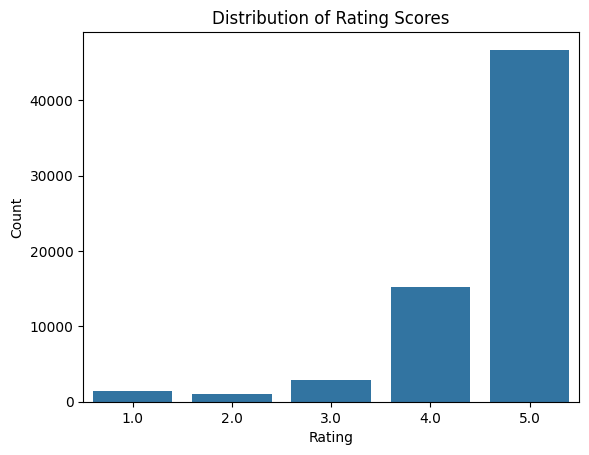

In [363]:
# distribution of rating
sns.countplot(x = df['reviews.rating'])

plt.title('Distribution of Rating Scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [364]:
# Ratings by Product
df_by_product = df.groupby(by = ['name','reviews.rating']).agg({'reviews.text':'count'}).reset_index()


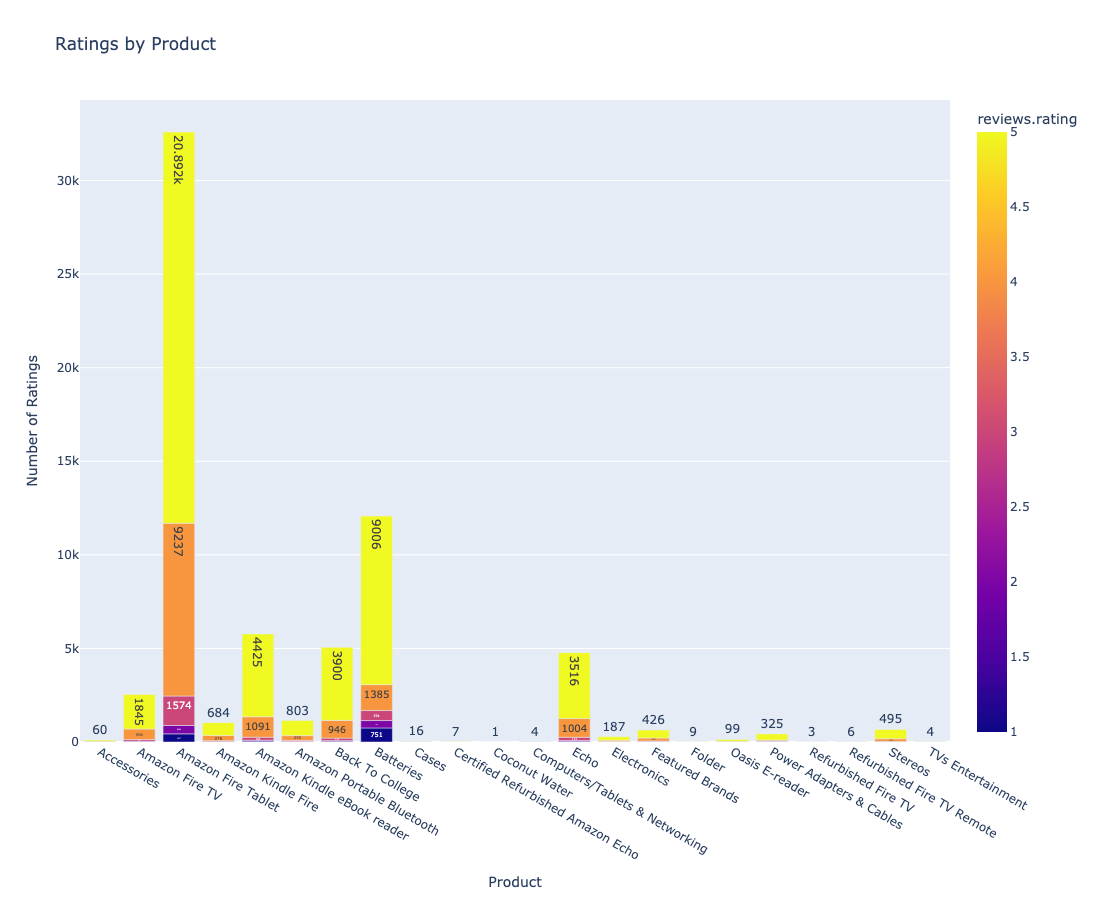

In [365]:
# distribution of rating
fig = px.bar(df_by_product, x = 'name', y='reviews.text', color = 'reviews.rating',
       title = 'Ratings by Product', 
       labels = {"name" : "Product", "reviews.text" : "Number of Ratings"}, text_auto = True, width=1100, height=900 )
fig.show("png")

#### Mapping Sentiment Based on Review Rating

- Mapped the Sentiment based on the review rating fields to positive or negative
- Sentiment and review text fields are used for the Analysis.


In [366]:
# Map the Sentiment score based on the reviews.rating field.
sentiment_score = {1: 0, 2: 0,3: 0,4: 1,5: 1}
sentiment = {0: 'NEGATIVE',1: 'POSITIVE'}
df['sentiment_score'] = df ['reviews.rating'].map(sentiment_score)
df['sentiment'] = df['sentiment_score'].map(sentiment)

In [367]:
# Taking only the required Field for the Sentiment Analysis
reviews[['text','sentiment']] = df[['reviews.text','sentiment']]

In [368]:
reviews.head()

,sentiment,text,char_count
0,POSITIVE,This product so far has not disappointed. My c...,143
1,POSITIVE,great for beginner or experienced person. Boug...,75
2,POSITIVE,Inexpensive tablet for him to use and learn on...,131
3,POSITIVE,I've had my Fire HD 8 two weeks now and I love...,593
4,POSITIVE,I bought this for my grand daughter when she c...,613


In [369]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67317 entries, 0 to 67991
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   67317 non-null  object
 1   text        67317 non-null  object
 2   char_count  67317 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.1+ MB


In [370]:
#Null value check
reviews.isna().sum()

sentiment     0
text          0
char_count    0
dtype: int64

In [371]:
#summary statistics of review length
reviews['char_count'] = reviews.text.apply(len)
reviews['char_count'].describe()

count    67317.000000
mean       149.820268
std        195.578991
min          1.000000
25%         63.000000
50%         98.000000
75%        175.000000
max      10670.000000
Name: char_count, dtype: float64

(0.0, 10000.0)

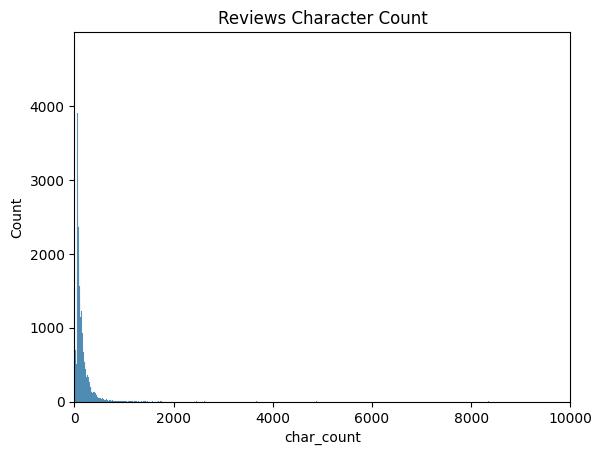

In [372]:
#character count visualization
fig, ax = plt.subplots()
sns.histplot(reviews['char_count'], ax = ax).set_title('Reviews Character Count')
ax.set_xlim(0, 10000)

In [376]:
# Removing the char count after checking the maximum char count
reviews.drop(columns=['char_count'],inplace=True)

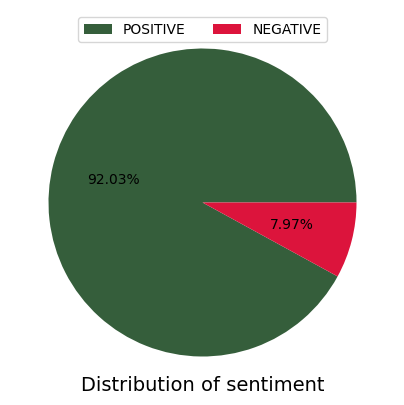

In [377]:
# Distribution of Sentiment

plt.figure(figsize = (5,5))

labels = ['POSITIVE', 'NEGATIVE']
colors = colors = ['#355E3B', '#DC143C']

plt.pie(reviews['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [378]:
# Changing the Sentiment to numerical column

sentiment = {'NEGATIVE':0, 'POSITIVE':1}
reviews['sentiment'] = reviews['sentiment'].map(sentiment)
reviews.head()

,sentiment,text
0,1,This product so far has not disappointed. My c...
1,1,great for beginner or experienced person. Boug...
2,1,Inexpensive tablet for him to use and learn on...
3,1,I've had my Fire HD 8 two weeks now and I love...
4,1,I bought this for my grand daughter when she c...


#### Train Test Split Data

In [382]:
# Split the Data into Train and Test
X = reviews.drop('sentiment', axis = 1)
y = reviews['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### Data Preprocessing

- Changed to text lowercase
- Punctuations, Numbers and Stop words removal
- Stemmed the review text.
- TDIDF is used for Feature Extraction

In [399]:
# Preprocessing Text
# Lower case, punctuations, numbers, stop words and Tokenization, 

def preprocess_text(text):
    #changing to lowercase
    text = text.lower()
    # Removing punctuations
    text = text.translate (str.maketrans('', '', string.punctuation))
    # Removing numbers in the text
    text = text.translate(str.maketrans('', '', digits))
    #Stop words
    sw = stopwords.words('english')
    #Stemming
    stem = PorterStemmer()
    return ' '.join([stem.stem(w) for w in word_tokenize(text) if w not in sw])

In [400]:
# Process the Train and Test Set
X_train_preprocessed = X_train['text'].apply(preprocess_text)
X_test_preprocessed  = X_test['text'].apply(preprocess_text)

In [401]:
X_train_preprocessed 

33043         work lot better fire stick love sd card slot
62595    great tablet easi oper great upgrad famili member
4088     purchas dad complaint he abl download game eas...
66044    bought gift daughter actual sound better easie...
1704                            like idea kindl tablet one
                               ...                        
37228                                        great product
6289                                        lot read right
54920    simpli put great tablet price surf web check e...
860      trade receiv christma happi love size screen r...
15824    daugther use leap frog tablet start batteri is...
Name: text, Length: 50487, dtype: object

In [403]:
params = {'tfidf__max_features': [100, 500, 1000, 2000]}

### Modelling

#### Logistic Regression

In [407]:
# TFIDF with Logistic Regression
lgr_tfidf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                       ('model', LogisticRegression())])
lgr_tfidf_grid = GridSearchCV(lgr_tfidf_pipe, param_grid=params)

lgr_tfidf_grid.fit(X_train_preprocessed,y_train)


result_df =[]
mean_fit_time_lgr_tfidf= lgr_tfidf_grid.cv_results_['mean_fit_time']
mean_score_time_lgr_tfidf= lgr_tfidf_grid.cv_results_['mean_score_time']
n_splits_lgr_tfidf  = lgr_tfidf_grid.n_splits_ #number of splits of training data
n_iter_lgr_tfidf = pd.DataFrame(lgr_tfidf_grid.cv_results_).shape[0] #Iterations per split

grid_time_lgr_tfidf = np.mean(mean_fit_time_lgr_tfidf + mean_score_time_lgr_tfidf) * n_splits_lgr_tfidf * n_iter_lgr_tfidf

result_df.append(
        {
            'model': 'Logistic',
            'best_params': lgr_tfidf_grid.best_params_,
            'best_score':  lgr_tfidf_grid.best_estimator_.score(X_test_preprocessed, y_test),
            'fit time': grid_time_lgr_tfidf
            
            
        })
    
pd.DataFrame(result_df)

,model,best_params,best_score,fit time
0,Logistic,{'tfidf__max_features': 2000},0.93672,7.57462


#### Decision Tree

In [408]:
# TFIDF with Decision Tree
dt_tfidf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                       ('model', DecisionTreeClassifier())])
dt_tfidf_grid = GridSearchCV(dt_tfidf_pipe, param_grid=params)

dt_tfidf_grid.fit(X_train_preprocessed,y_train)


mean_fit_time_dt_tfidf= dt_tfidf_grid.cv_results_['mean_fit_time']
mean_score_time_dt_tfidf= dt_tfidf_grid.cv_results_['mean_score_time']
n_splits_dt_tfidf  = dt_tfidf_grid.n_splits_ #number of splits of training data
n_iter_dt_tfidf = pd.DataFrame(dt_tfidf_grid.cv_results_).shape[0] #Iterations per split

grid_time_dt_tfidf = np.mean(mean_fit_time_dt_tfidf + mean_score_time_dt_tfidf) * n_splits_dt_tfidf * n_iter_dt_tfidf

result_df.append(
        {
            'model': 'Decision Tree',
            'best_params': dt_tfidf_grid.best_params_,
            'best_score':  dt_tfidf_grid.best_estimator_.score(X_test_preprocessed, y_test),
            'fit time': grid_time_dt_tfidf
            
            
        })
    
pd.DataFrame(result_df)

,model,best_params,best_score,fit time
0,Logistic,{'tfidf__max_features': 2000},0.936720,7.574620
1,Decision Tree,{'tfidf__max_features': 2000},0.939156,102.198809


#### Navie Bayes

In [409]:
# TFIDF with NavieBayes
nb_tfidf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                       ('model', MultinomialNB())])
nb_tfidf_grid = GridSearchCV(nb_tfidf_pipe, param_grid=params)

nb_tfidf_grid.fit(X_train_preprocessed,y_train)

mean_fit_time_nb_tfidf= nb_tfidf_grid.cv_results_['mean_fit_time']
mean_score_time_nb_tfidf= nb_tfidf_grid.cv_results_['mean_score_time']
n_splits_nb_tfidf  = nb_tfidf_grid.n_splits_ #number of splits of training data
n_iter_nb_tfidf = pd.DataFrame(nb_tfidf_grid.cv_results_).shape[0] #Iterations per split

grid_time_nb_tfidf = np.mean(mean_fit_time_nb_tfidf + mean_score_time_nb_tfidf) * n_splits_nb_tfidf * n_iter_nb_tfidf

result_df.append(
        {
            'model': 'Bayes',
            'best_params': nb_tfidf_grid.best_params_,
            'best_score':  nb_tfidf_grid.best_estimator_.score(X_test_preprocessed, y_test),
            'fit time': grid_time_nb_tfidf
            
            
        })
    
pd.DataFrame(result_df)

,model,best_params,best_score,fit time
0,Logistic,{'tfidf__max_features': 2000},0.936720,7.574620
1,Decision Tree,{'tfidf__max_features': 2000},0.939156,102.198809
2,Bayes,{'tfidf__max_features': 2000},0.928758,6.827639


#### Support Vector Classifier

In [412]:
# TFIDF with SVC
svc_tfidf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                       ('model', SVC(kernel = 'linear'))])
svc_tfidf_grid = GridSearchCV(nb_tfidf_pipe, param_grid=params)

svc_tfidf_grid.fit(X_train_preprocessed,y_train)

mean_fit_time_svc_tfidf= svc_tfidf_grid.cv_results_['mean_fit_time']
mean_score_time_svc_tfidf= svc_tfidf_grid.cv_results_['mean_score_time']
n_splits_svc_tfidf  = svc_tfidf_grid.n_splits_ #number of splits of training data
n_iter_svc_tfidf = pd.DataFrame(svc_tfidf_grid.cv_results_).shape[0] #Iterations per split

grid_time_svc_tfidf = np.mean(mean_fit_time_svc_tfidf + mean_score_time_svc_tfidf) * n_splits_svc_tfidf * n_iter_svc_tfidf

result_df.append(
        {
            'model': 'SVC',
            'best_params': svc_tfidf_grid.best_params_,
            'best_score':  svc_tfidf_grid.best_estimator_.score(X_test_preprocessed, y_test),
            'fit time': grid_time_svc_tfidf
            
            
        })
    
pd.DataFrame(result_df)

,model,best_params,best_score,fit time
0,Logistic,{'tfidf__max_features': 2000},0.936720,7.574620
1,Decision Tree,{'tfidf__max_features': 2000},0.939156,102.198809
2,Bayes,{'tfidf__max_features': 2000},0.928758,6.827639
3,SVC,{'tfidf__max_features': 2000},0.928758,6.885244
